## Dual polarimetric descriptors from GRD SAR data

Implemented from " Bhogapurapu, N., Dey, S., Bhattacharya, A., Mandal, D., Lopez-Sanchez, J.M., McNairn, H., López-Martínez, C. and Rao, Y.S., 2021. Dual-polarimetric descriptors from Sentinel-1 GRD SAR data for crop growth assessment. ISPRS Journal of Photogrammetry and Remote Sensing, 178, pp.20-35. " doi: [10.1016/j.isprsjprs.2021.05.013](https://doi.org/10.1016/j.isprsjprs.2021.05.013)


In [10]:

from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt


In [11]:
fc11 = r'./data/ALOS_HH_2020_10km.tif'
ds = gdal.Open(fc11)
c11 = ds.GetRasterBand(1).ReadAsArray()

fc12 = r'./data/ALOS_HV_2020_10km.tif'
ds = gdal.Open(fc12)
c12 = ds.GetRasterBand(1).ReadAsArray()

## Theory
Cross-pol ratio ($q$):
$ q = \frac{\sigma_{\text{VH}}^\circ}{\sigma_{\text{VV}}^\circ} $ or $ q = \frac{\sigma_{\text{HV}}^\circ}{\sigma_{\text{HH}}^\circ} \qquad 0\le q \le1$

#### Co-pol purity parameter ($m_c$):

$m_c = \frac{1-q}{1+q} \qquad 0\le m_c \le1 $

#### Pseudo entropy ($H_c$):

$\begin{equation*}
H_c = -  \sum_{i=1}^{2} p_i \log_2 p_i \qquad 0\le H_c \le1
\end{equation*}
$

where
$p_1 = \frac{1}{1+q}$, 
$p_2 = \frac {q}{1+q}$

#### Pseudo Scattering type parameter ($\theta_c$):

$\theta_c = \tan^{-1}\left(\frac{(1-q)^2}{1-q+q^2}\right) \qquad 0^\circ \le \theta_c \le45^\circ$

#### Dual-pol Radar Vegetation Index for GRD data ($\text{DpRVI}_c$):

$\text{DpRVI}_c = \frac{q(q+3)}{(1+q)^2} \qquad 0\le \text{DpRVI}_c \le1$

In [12]:
q = c12/c11
q[q==1]=1
mc = (1-q)/(1+q)
p1 = 1/(1+q)
p2 = q/(1+q)
Hc = -1*(p1*np.log2(p1)+p2*np.log2(p2))
thetac = np.arctan(((1-q)**2)/(1-q+q**2)) * (180/np.pi)
DpRVIc = (q*(q+3)/((q+1)**2))

C:\Users\COE\AppData\Local\Temp\ipykernel_30432\2676676814.py:1: RuntimeWarning: invalid value encountered in divide
  q = c12/c11


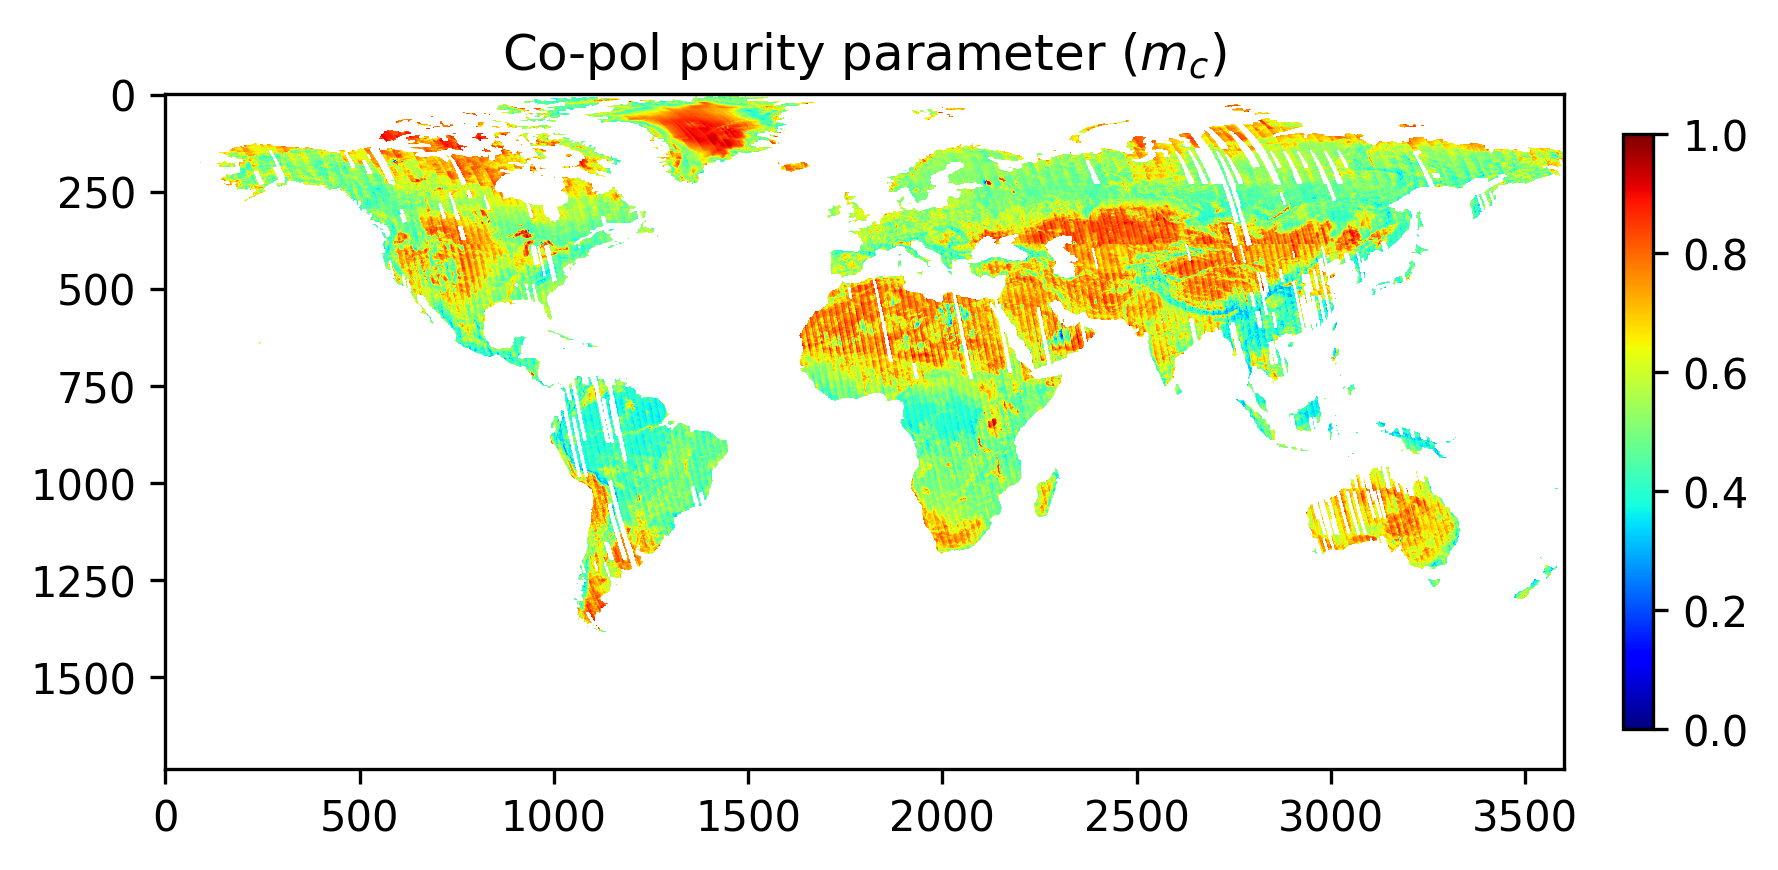

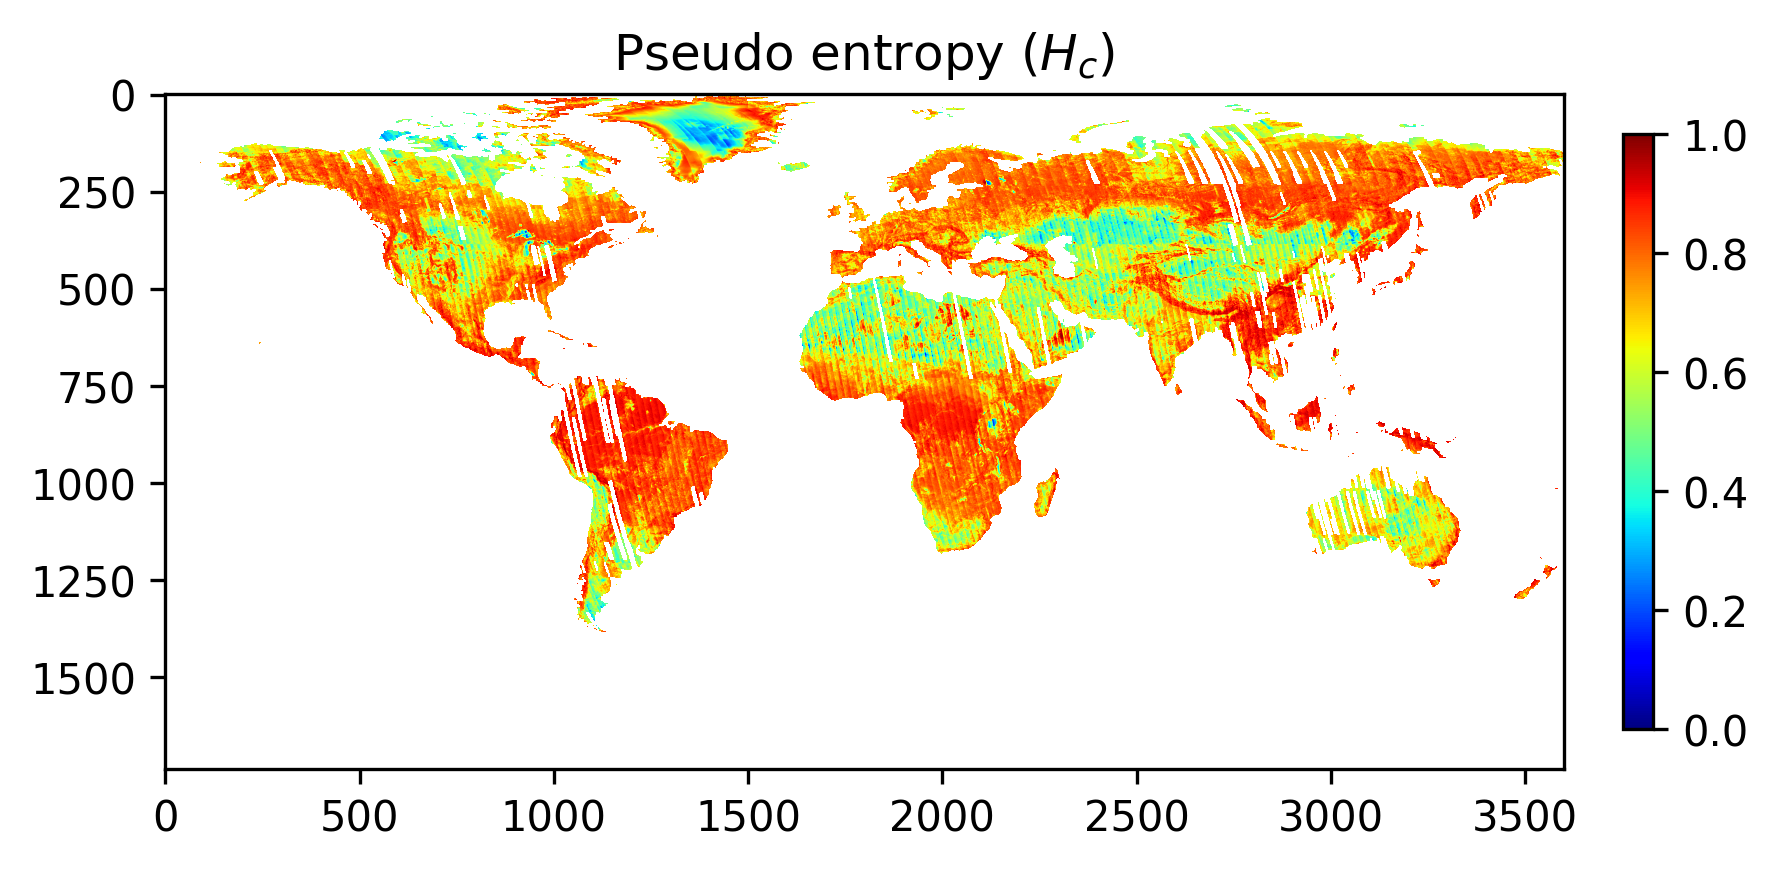

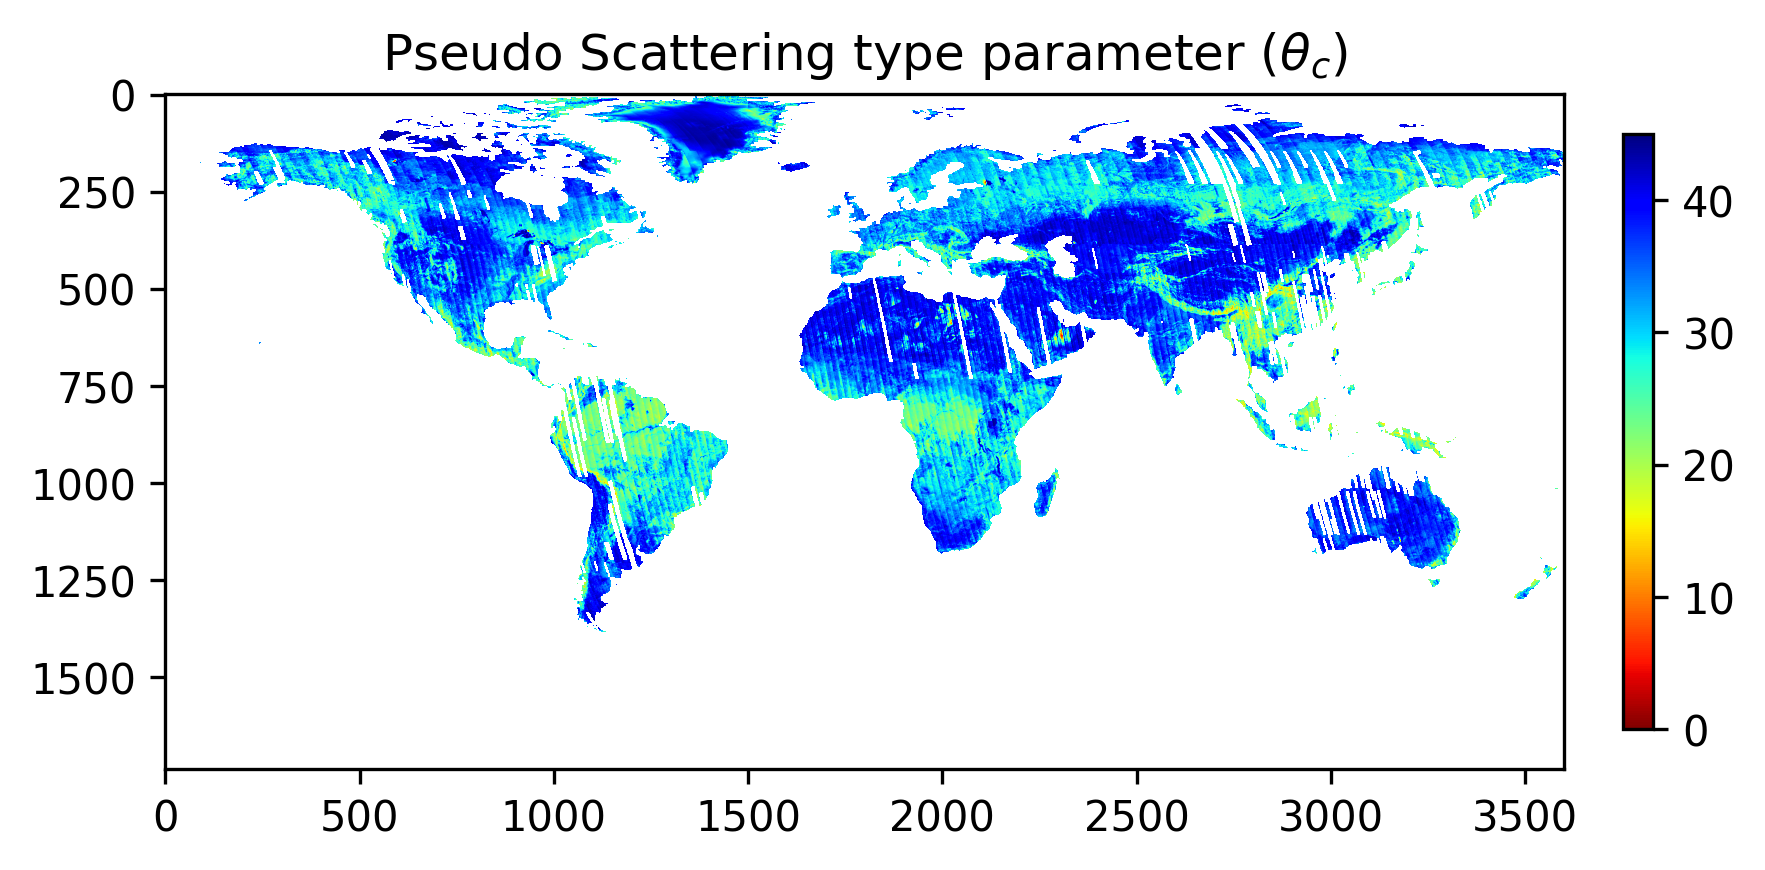

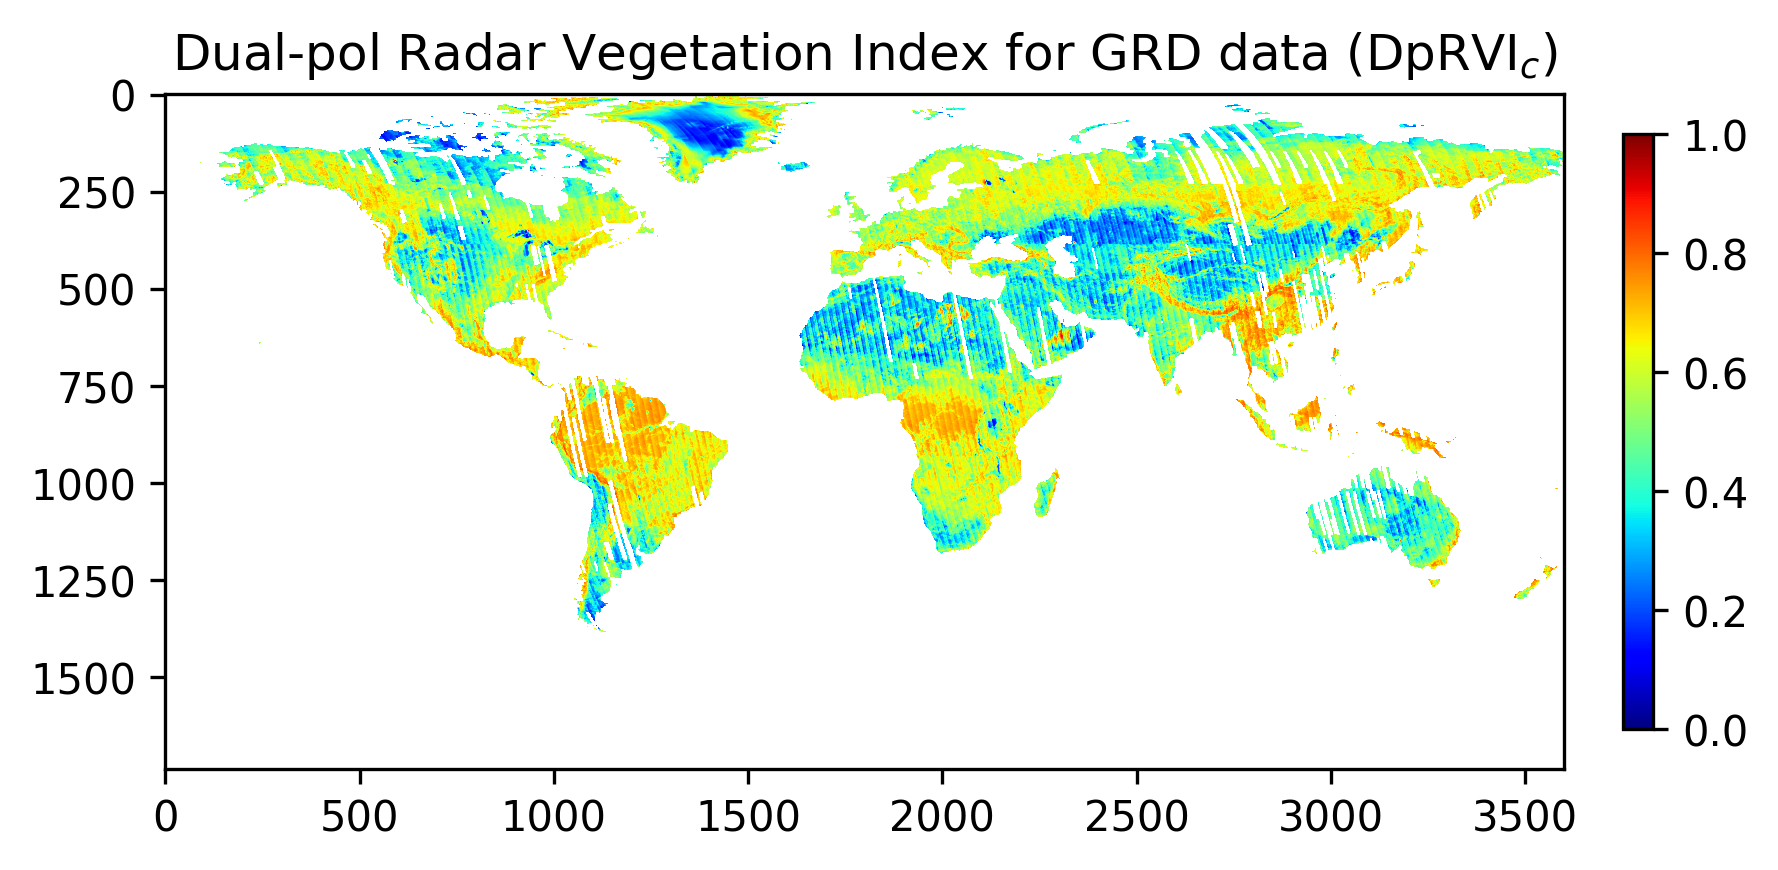

In [14]:
fig,ax = plt.subplots(dpi=300)
im = plt.imshow(mc,cmap='jet',vmin=0,vmax=1)
plt.title(r'Co-pol purity parameter ($m_c$)')
plt.colorbar(im,fraction=0.02, pad=0.04)

fig,ax = plt.subplots(dpi=300)
im = plt.imshow(Hc,cmap='jet',vmin=0,vmax=1)
plt.title(r'Pseudo entropy ($H_c$)')
plt.colorbar(im,fraction=0.02, pad=0.04)

fig,ax = plt.subplots(dpi=300)
im = plt.imshow(thetac,cmap='jet_r',vmin=0,vmax=45)
plt.title(r'Pseudo Scattering type parameter ($\theta_c$)')
plt.colorbar(im,fraction=0.02, pad=0.04)

fig,ax = plt.subplots(dpi=300)
im = plt.imshow(DpRVIc,cmap='jet',vmin=0,vmax=1)
plt.title(r'Dual-pol Radar Vegetation Index for GRD data ($\mathrm{DpRVI}_c$)')
plt.colorbar(im,fraction=0.02, pad=0.04)
